In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [4]:
X_test.shape

(10000, 784)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [8]:
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_train[1000]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
print(X_train.shape)

(60000, 28, 28, 1)


In [11]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),

    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),

    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 30, 30, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                        

In [12]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [14]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 24s 115ms/step - loss: 0.6617 - accuracy: 0.7664 - val_loss: 0.4293 - val_accuracy: 0.8532
Epoch 2/5
200/200 [==============================] - 56s 278ms/step - loss: 0.4065 - accuracy: 0.8564 - val_loss: 0.3692 - val_accuracy: 0.8770
Epoch 3/5
200/200 [==============================] - 61s 307ms/step - loss: 0.3522 - accuracy: 0.8759 - val_loss: 0.3252 - val_accuracy: 0.8878
Epoch 4/5
200/200 [==============================] - 56s 281ms/step - loss: 0.3195 - accuracy: 0.8861 - val_loss: 0.3066 - val_accuracy: 0.8926
Epoch 5/5
200/200 [==============================] - 19s 95ms/step - loss: 0.2993 - accuracy: 0.8926 - val_loss: 0.2909 - val_accuracy: 0.8964


<Axes: >

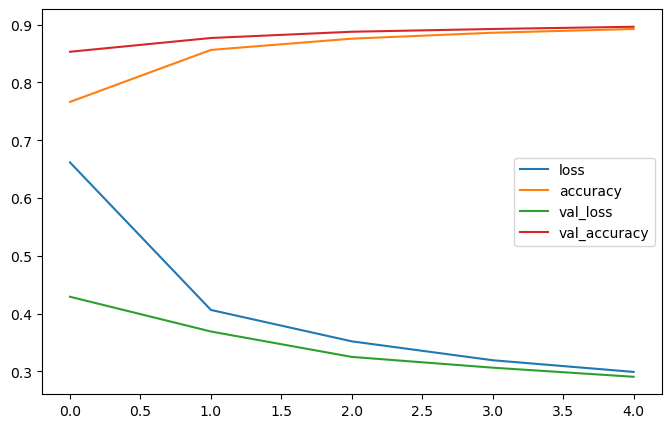

In [15]:
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
pd.DataFrame(history.history).plot(figsize=(8,5))

1/1 [==============================] - 0s 58ms/step
🔍 Layer Name: zero_padding2d
🎨 Activation Shape: (1, 30, 30, 1)


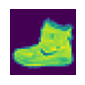

----------------------------------------
🔍 Layer Name: conv2d
🎨 Activation Shape: (1, 28, 28, 32)


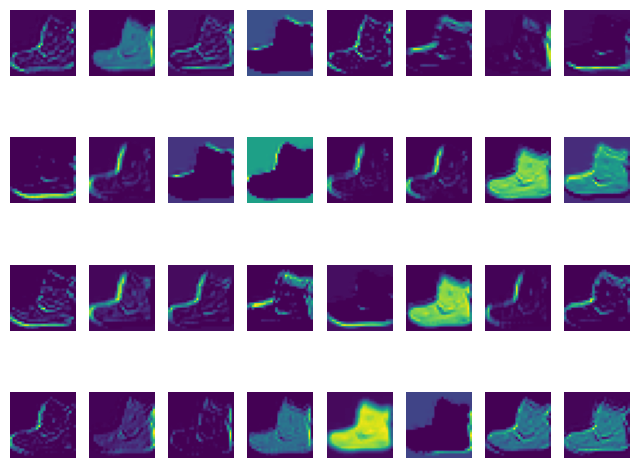

----------------------------------------
🔍 Layer Name: dropout
🎨 Activation Shape: (1, 28, 28, 32)


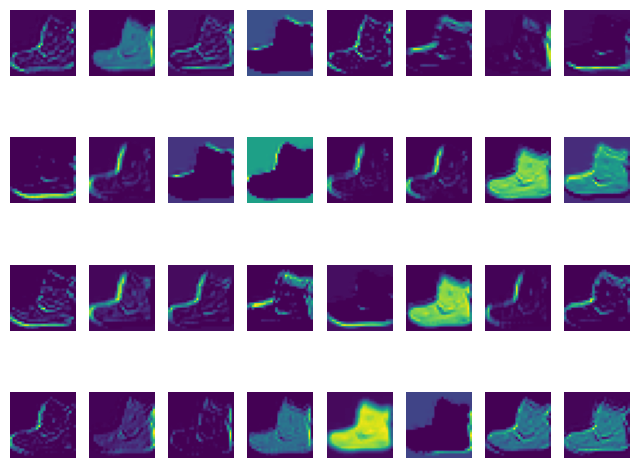

----------------------------------------
🔍 Layer Name: max_pooling2d
🎨 Activation Shape: (1, 14, 14, 32)


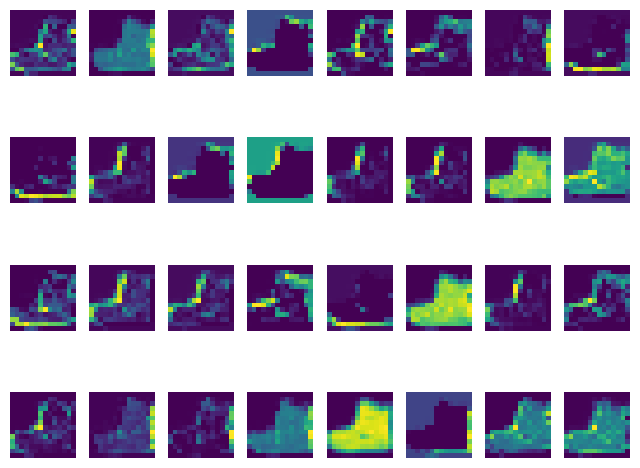

----------------------------------------
🔍 Layer Name: zero_padding2d_1
🎨 Activation Shape: (1, 16, 16, 32)


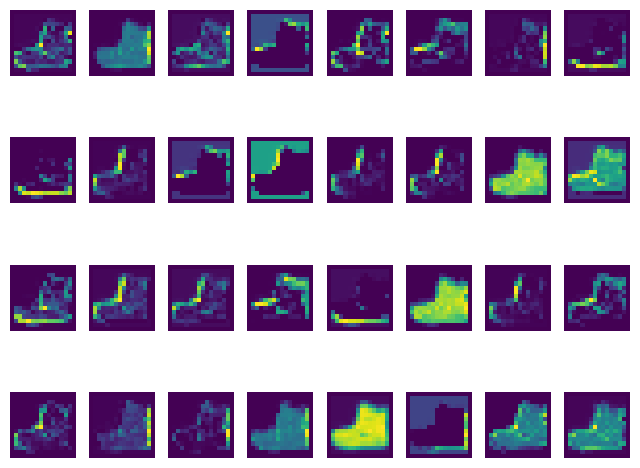

----------------------------------------
🔍 Layer Name: conv2d_1
🎨 Activation Shape: (1, 14, 14, 64)


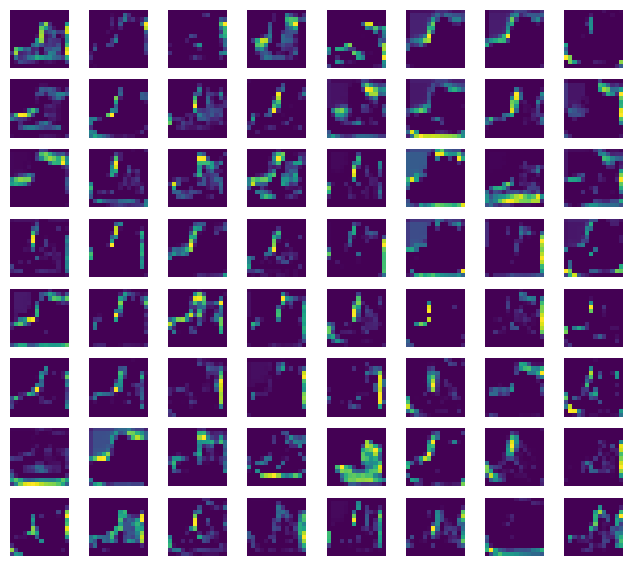

----------------------------------------
🔍 Layer Name: dropout_1
🎨 Activation Shape: (1, 14, 14, 64)


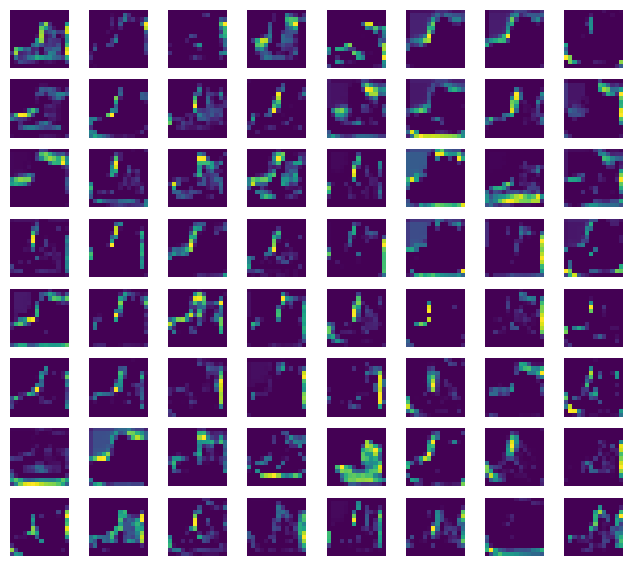

----------------------------------------
🔍 Layer Name: max_pooling2d_1
🎨 Activation Shape: (1, 7, 7, 64)


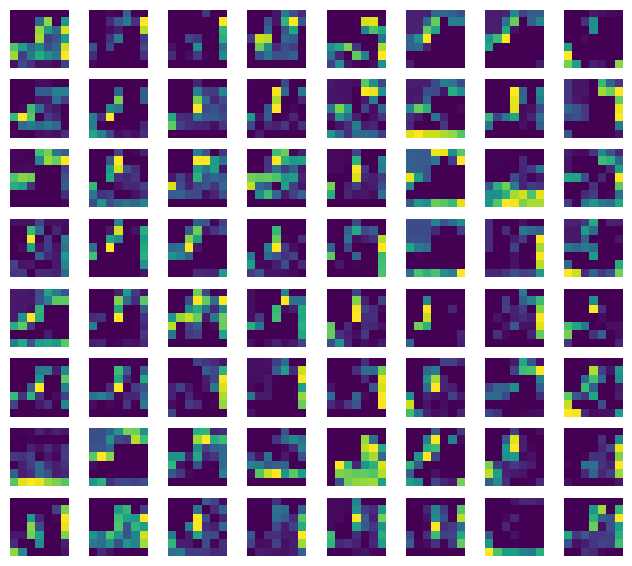

----------------------------------------
🔍 Layer Name: flatten
🎨 Activation Shape: (1, 3136)
----------------------------------------
🔍 Layer Name: dense
🎨 Activation Shape: (1, 128)
----------------------------------------
🔍 Layer Name: dropout_2
🎨 Activation Shape: (1, 128)
----------------------------------------
🔍 Layer Name: dense_1
🎨 Activation Shape: (1, 10)
----------------------------------------


In [36]:
import os
import matplotlib.pyplot as plt

# Define the folder to save the figures
save_folder = 'saved_figs'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Define a new model that outputs the feature maps of each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for a specific input image
sample_image = X_train[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(sample_image)

# Visualize the feature maps at each layer and save the figures
layer_names = [layer.name for layer in model.layers]
for layer_name, layer_activation in zip(layer_names, activations):
    print(f'🔍 Layer Name: {layer_name}')
    print(f'🎨 Activation Shape: {layer_activation.shape}')
    
    if len(layer_activation.shape) == 4 and layer_activation.shape[1] > 0:
        num_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        display_grid = min(num_features, 64)
        
        # Create a figure to display the feature maps
        plt.figure(figsize=(8, 8))
        
        for i in range(display_grid):
            plt.subplot(display_grid // 8 + 1, 8, i + 1)  # Fixing the number of rows
            plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
            plt.axis('off')

        
        
        # Save the figure in the 'saved_figs' folder
        fig_path = os.path.join(save_folder, f'{layer_name}_feature_maps.png')
        plt.savefig(fig_path)
        plt.show()
        plt.close()
    
    print('----------------------------------------')

In [ ]:
model.save('masoud.h5')

In [ ]:
# MasoudKaviani.ir